# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных:

- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах(м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

# Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pd.set_option('display.max_columns', 30)

In [2]:
# чтобы таблица была читаема нужно указать разделитель \t
try:
    realty = pd.read_csv('D:/repository/projects/2_исследовательский анализ данных/real_estate_data.csv', sep = '\t')
except:
    realty = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
realty.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### посмотрим общую информацию о датафрейме

In [3]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
# для наглядностти посмотрим где есть пропуски
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# проверим наличие дубликатов по всему датафрейму
realty.duplicated().sum()

0

проверим столбец locality_name, чтобы узнать есть ли  дубликаты (один и тот же населённый пункт написаный по разному)

In [7]:
realty['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

### Вывод

Всего в датафрейме 22 столбца и 23699 строк. Явных дубликатов не обнаружено. В датафрейме имеются пропуски в некоторых столбцах, на этапе предобработки выясню что за пропуски и избавлюсь от них. Так же некоторые столбцы, например floors_total, имеют тип данных float64, далее в этих столбцах поменяю тип данных на целочисленный. Дату и время приведу к формату %Y-%m-%d, т.е. оставлю только год, месяяц, день, остальные данные излишние. 
Так же заметил значения, которые сильно отличаются от средних:
- total_area - максимальное значение 900 квадратных метров
- rooms - максимальное значение 19 комнат
- ceiling_hight - 100 метров, высоковато даже для дома, не то что для потолка
- floors_total - 60 этажей (как-то слишком, явно ошибка)
- living_area - 409 квадратов
- kitchen_area - 112 квадратных метров (кухня размером с квартиру) 
- balcony - 5 штук, тоже как-то много балконов на одну квартиру

В названиях населённых пунктов встречаются е и ё в слове поселок. Так же заметил что есть наименования, как 'поселок Мурино' и 'Мурино', и 'деревня Кудрово' и 'Кудрово'

Пропусков в фрейме довольно много. На данном этапе все пропуски объяснить не смогу, предполагаю, что некототрые поля к заполнению не являются обязательными и были пропущены по причине незнания, как их заполнить и отсутствия желанию узнать, как заполнить это поле заполнить. Во в столбце is_apartment предполагаю, что это не апартаменты вовсе, т.к. если это апартаменты, то поле обязательно заполнено - это важная информация.

Данные, которые получены автоматическии имеют пропуски, т.к. не совсем ясно что считать парком, а что водоёмом. И возможно просто не достаточно картографических данных.

# Шаг 2. Предобработка данных

удалим пропуски в столбце floors_total. 0.36% сисльно не повлияют на общую статистику

In [8]:
realty.dropna(subset=['floors_total'], inplace=True)

пропуски в столбце balcony заменим на 0, полагаю что балкона просто нет в квартире и это не такая и редкость. например в кваритре, в которой я проживаю сейчас он отсутствует

In [9]:
realty['balcony'] = realty['balcony'].fillna(0)

заменим пропуски в столбце is_apartment, считаю, что если есть пропуск то значит что это не апартаменты 

In [10]:
realty['is_apartment'] = realty['is_apartment'].fillna(0)

избавимся от неточностей в столбце locality_name

In [11]:
def normalize_locality_name(value):
    if str(value) == 'nan':
        return
    
    localities = ['Мурино', 'Кудрово']
    words = value.split(' ')
    
    if words[0] == 'посёлок':
        words[0] = 'поселок'
    
    for locality in localities:
        if locality in words:
            return locality
        
    return ' '.join(words)

In [12]:
realty['locality_name'] = realty['locality_name'].apply(normalize_locality_name)

In [13]:
# и удалим пропуски в этом столбце
realty.dropna(subset=['locality_name'], inplace=True)

In [14]:
# дату и время приведём к читаемому формату 
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%d')

приведём в порядок столбец ceiling_height 

In [15]:
realty['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Обычно потолки 2.5 - 3.2 метра, оставим значения в этом диапозоне. Видно что есть значения менее 2 метров, можно добавить метр сверху, так же более 10 метров, предполагаю что ошибка при заполнении, если поделить на 10, то будет вполне приемлимое значение. Так же есть значение 100 метров (явно ошибка, избавимся от него).

In [16]:
# округлим значения до десятых долей
realty['ceiling_height'] = realty['ceiling_height'].round(decimals=1)

In [17]:
def celling_height(height):
    if height >= 10:
        height /= 10
        return height
    if height <= 2:
        height += 1
        return height
    return height

In [18]:
# удалим ложное значение
realty = realty.loc[realty['ceiling_height'] != 100]

In [19]:
#Применим функцию к столбцу
realty['ceiling_height'] = realty['ceiling_height'].apply(celling_height)

In [20]:
# пропуски заменим средним значением
realty['ceiling_height'] = realty['ceiling_height'].fillna(realty['ceiling_height'].median().round(decimals=1))

#### пропуски в столбце days_exposition трогать не будем (предполагаю что такие объявления активные)

закроем пропуски в столбце living_area, для этого посчитаем соотношение жилой площади к общей, усреднённое значение добавим в рассчёты, так же поступим для заполнения пропусков в столбце kitchen_area

In [21]:
# добавим в таблицу соотношение жилой и общей площади
realty['living_area_ratio'] = realty['living_area'] / realty['total_area']

In [22]:
# заполним пропуски в столбце living_area
realty['living_area'] = realty['living_area'].fillna(realty['total_area'] * realty['living_area_ratio'].mean())

In [23]:
# обновим данные с столбце living_area_ratio, чтобы не осталось пропусков
realty['living_area_ratio'] = realty['living_area'] / realty['total_area']

In [24]:
# добавим в таблицу отношение площади кухни к общей
realty['kitchen_area_ratio'] = realty['kitchen_area'] / realty['total_area']

In [25]:
# заполним пропуски в солбце kitchen_area
realty['kitchen_area'] = realty['kitchen_area'].fillna(realty['total_area'] * realty['kitchen_area_ratio'].mean())

In [26]:
# обновим данные с столбце kitchen_area_ratio, чтобы не осталось пропусков
realty['kitchen_area_ratio'] = realty['kitchen_area'] / realty['total_area']

заполним пропуски в столбцах cityCenters_nearest и airpoprts_nearest медианным значением

In [27]:
realty['cityCenters_nearest'] = realty['cityCenters_nearest'].fillna(realty['cityCenters_nearest'].median())

In [28]:
realty['airports_nearest'] = realty['airports_nearest'].fillna(realty['airports_nearest'].median())

#### Итог
Заполнить пропуски в столбцах parks_around3000, parks_nearest, ponds_around3000, ponds_nearest не представляется возможным, т.к. нет необходимых данных для этого. И для дальнейшего анализа эти данные не требуются, по этому их можно не трогать

### Шаг 2.1. Замена типов данных

In [29]:
# в столбце is_apartment заменим тип данных на булевый, чтобы остались только значения True и False
realty['is_apartment'] = realty['is_apartment'].astype('bool')

In [30]:
# в столбце floors_total заменим тип данных на целочисленный
realty['floors_total'] = realty['floors_total'].astype('int')

In [31]:
# в столбце balcony заменим тип данных на целочисленный
realty['balcony'] = realty['balcony'].astype('int')

### Шаг 3. Посчитайте и добавьте в таблицу

In [32]:
# добавим цена квадратного метра, округлив значений до десятых долей
realty['price_per_m2'] = (realty['last_price'] / realty['total_area']).round(decimals=1)

In [33]:
# добавим в таблицу: день недели, месяц и год публикации объявления
realty['week_day'] = realty['first_day_exposition'].dt.weekday
realty['month'] = realty['first_day_exposition'].dt.month
realty['year'] = realty['first_day_exposition'].dt.year

In [34]:
# проведём категоризацию по этажам
def cat_on_the_floors (row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
# применим функцию к датайрейму
realty['cat_on_the_floors'] = realty.apply(cat_on_the_floors, axis=1)

#### столбцы, где считаем соотношение жилой и общей площади, а также отношение площади кухни к общей, уже добавил ранее


In [35]:
# для наглядности ещё раз округлим всё до десятых долей 
realty = realty.round(decimals=1)
realty.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_per_m2,week_day,month,year,cat_on_the_floors
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.5,0.2,120370.4,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.5,0.3,82920.8,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.6,0.1,92785.7,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,89.8,9,False,False,False,29.8,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.6,0.2,408176.1,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.3,0.4,100000.0,1,6,2018,другой


Ещё раз проверим пропуски и типы данных, чтобы убедиться что ничего не упущено

In [36]:
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
living_area_ratio           0
kitchen_area_ratio          0
price_per_m2                0
week_day                    0
month                       0
year                        0
cat_on_the_floors           0
dtype: int64

In [37]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23564 non-null int64
last_price              23564 non-null float64
total_area              23564 non-null float64
first_day_exposition    23564 non-null datetime64[ns]
rooms                   23564 non-null int64
ceiling_height          23564 non-null float64
floors_total            23564 non-null int32
living_area             23564 non-null float64
floor                   23564 non-null int64
is_apartment            23564 non-null bool
studio                  23564 non-null bool
open_plan               23564 non-null bool
kitchen_area            23564 non-null float64
balcony                 23564 non-null int32
locality_name           23564 non-null object
airports_nearest        23564 non-null float64
cityCenters_nearest     23564 non-null float64
parks_around3000        18064 non-null float64
parks_nearest           8029 non-null float64
ponds_around

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [38]:
# составим фрейм данных для исследовательского анализа  
research_realty = pd.DataFrame(realty.loc[(realty['total_area']>=12) & (realty['total_area']<=115)
    & (realty['last_price']>=3000000) & (realty['last_price']<=18000000) 
    & (realty['rooms']>=1) & (realty['rooms']<=6) 
    & (realty['ceiling_height']>=2.5) & (realty['ceiling_height']<=3.2)])

research_realty.reset_index()


features = ['total_area', 'last_price', 'rooms', 'ceiling_height']

total_area


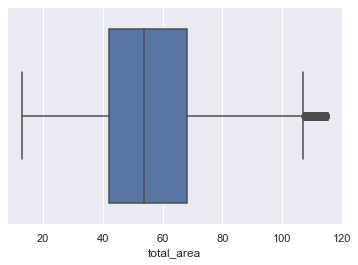

last_price


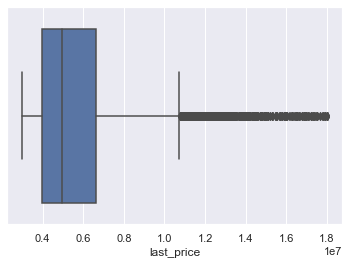

rooms


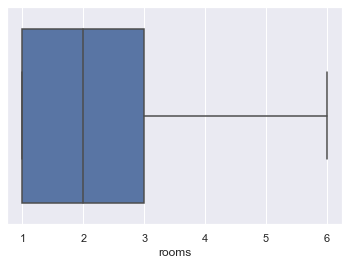

ceiling_height


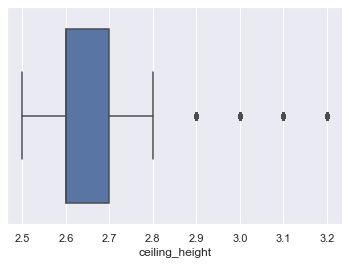

In [39]:
for feature in features:
    print(feature)
    sns.boxplot(
        data=research_realty,
        x=feature
    )
    plt.show()

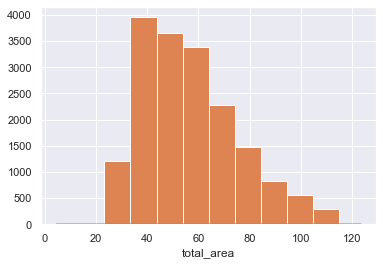

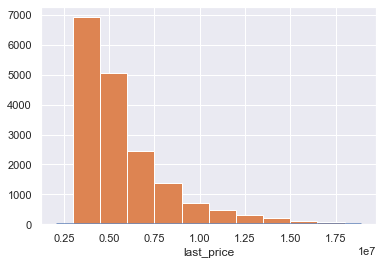

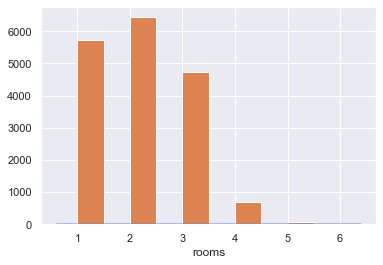

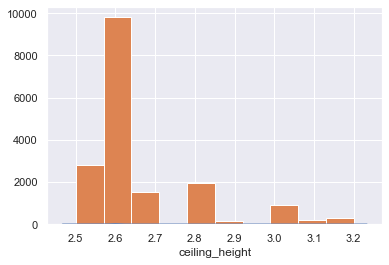

In [40]:
for feature in features:
    sns.distplot(research_realty[feature], norm_hist=False, kde=True, bins=50)
    plt.hist(research_realty[feature])
    plt.show()

#### Что видим: 

##### Площадь

- Основная масса значений по площади лежим в диапозоне до 70 квадратов, на мой взглляд данные правдоподобные, добротная двушка
- Первый квартиль находится на уровне 40 кв.м., средний размер однокомнатной квартиры
- Минимальное значение 12 кв.м, но это мы и так знали
- Верхний ус упирается в значение около 115 кв.м., хорошая четырёхкомнатная квартира
- Основная масса имеет площадь от ~35 до 65 кв.м.

##### Стоимость

- Основная масса значений по стоимости лежим в диапозоне до 10,5 миллионов, цена за 2 и более комнат
- Первый квартиль находится на уровне 4,5 миллионов, нормальная цена за однушку
- Верхний ус упирается в значение около 18 миллионов, в новых домах двушка около 90 квадратов так и стоит
- Видно, что большая часть квартир продается по стоимости от 4 до 6 миллионов рублей

##### Число комнат 

- Основная масса квартир имеют 1 - 3 комнаты
- Минимальное значение 1, но это и так понятно, не бывает квартир без комнат
- Границы упирается в 6 комнат
- Самые популярные квартиры 1 - 3 комнаты, это и не удивительно

##### Высота потолков

- Значения в основнном лежат в диапозоне 2.6 - 2.7 метров
- Нижняя граница 2.5 метра
- Верхняя 2.8 метра
- Основная масса квартир имеет высоту потолков 2.6 метра

#### 4.5 изучаем время продажи квартир

пороговое значение возьму примерно в 1.5 года, около 550 дней

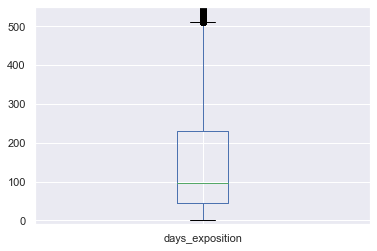

In [41]:
plt.ylim(-10, 550)
realty.boxplot(column='days_exposition')
plt.show()

- большая часть значений лежит в диапозоне до 220 дней, на мой взгляд это нормально, далеко не всегда можно продать кваритру быстро.
- верхний ус упирается в границу примерно 500 дней

Остальные знаечения считаю выбросами

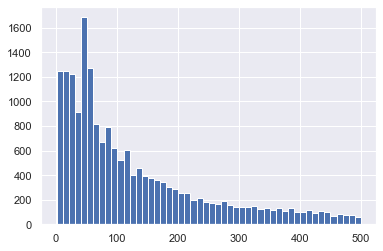

In [42]:
realty.query('days_exposition >= 1 and days_exposition <= 500')['days_exposition'].hist(bins=50)
plt.show()

In [43]:
print('Среднее арифметическое:{: .0f}'.format(realty['days_exposition'].mean()))
print('Медиана:{: .0f}'.format(realty['days_exposition'].median()))

Среднее арифметическое: 181
Медиана: 95


Больше всего квартир были проданы примерно за 50 дней, квартир которые продаются более 100 дней заметно меньше. Объявления, которые были активны 300 и более дней так же имееют место быть, видимо это не самые дешёвые варианты, следовательно не самые ходовые. Медианное значение 95, среднее 181

#### Итог:
Всё что лежит в диапозоне до 100 дней можно считать быстрыми продажами.

#### 4.6. Изучение факторов, влияющих на стоимость недвижимости

Параметры как площадь, число комнат, высота потолков, стотимость и тд мы рассччитавали ранее. Необходимо узнать какой диапозон использовать в расчётах по удалённости от центра 

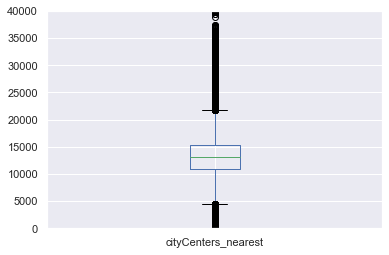

In [44]:
plt.ylim(0, 40000)
realty.boxplot('cityCenters_nearest')
plt.show()

Основная масса значений лежит в диапозоне до 22 км

### Зависимость стоимости от кв.м.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


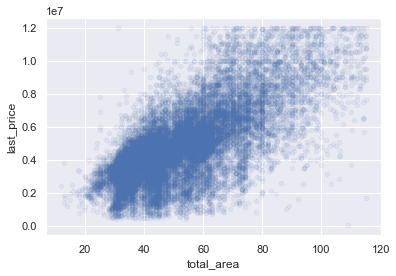

0.6536757294074123

In [45]:
(realty
    .query('total_area<=115 and last_price<=12000000 and rooms<=6 and cityCenters_nearest<=22000')
    .plot(x='total_area', y='last_price', kind='scatter', alpha=0.07, grid=True)
)
plt.show()
realty['total_area'].corr(realty['last_price'])

Явно просматривается линейная зависимость, чем больше площадь тем выше стоимость. Коэффициен корреляции это подтверждает

### Зависимость стоимости от числа комнат

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


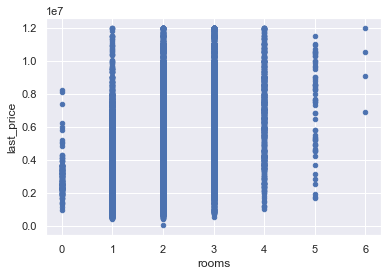

0.36323544098951505

In [46]:
(realty
    .query('total_area<=115 and last_price<=12000000 and rooms<=6 and cityCenters_nearest<=22000')
    .plot(x='rooms', y='last_price', kind='scatter', grid=True)
)
plt.show()
realty['rooms'].corr(realty['last_price'])

Как ранее я узнал, что основная масса квартир 1 - 3 комнаты. По графику не совсем понятно как, непосредственно, количество комнат влияет на стоимость. 

### Зависимость стоимости от этажа

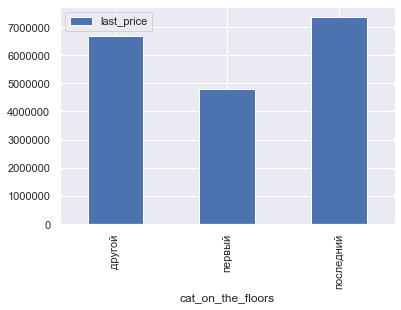

In [47]:
realty.pivot_table(index='cat_on_the_floors', values='last_price').plot(kind='bar', grid=True)
plt.show()

Хорошо заметно, что на первом этаже квартиры дешевле чем на других этажах. Самые дорогие располагаются на последнем этаже.

### Зависимость стоимости от удалённости от центра

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


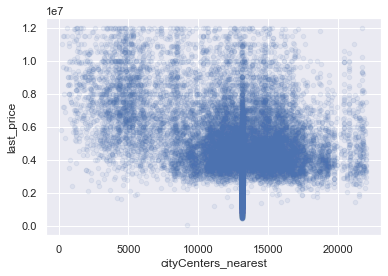

-0.19059915005464992

In [48]:
(realty
    .query('total_area<=115 and last_price<=12000000 and rooms<=6 and cityCenters_nearest<=22000')
    .plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, alpha=0.09)
)
plt.show()
realty['cityCenters_nearest'].corr(realty['last_price'])

Большинство квартир находятся на удалённости от центра 10 - 18 километров. Основная масса дорогих квартир находится ближе к центру, что не удивительно. Но это противоречит коэф. корреляции

### Зависимость стоимости от даты размещения

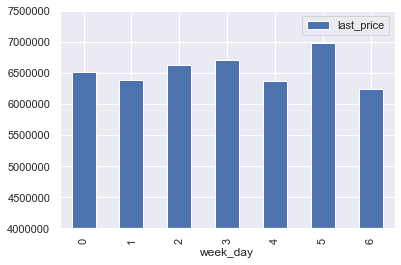

In [49]:
# от дня недели
(realty
    .pivot_table(index='week_day', values='last_price')
    .plot(kind='bar', grid=True, ylim=(4000000, 7500000))
)
plt.show()

Объявления, которые размещались по субботам чуть дороже остальных, объяснить такое распределение никак не могу. На мой взгляд конкретный день недели никак не может влиять на стоимость. 

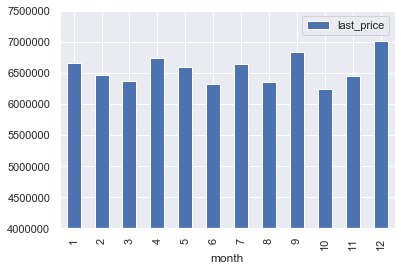

In [50]:
# от месяца
(realty
    .pivot_table(index='month', values='last_price')
    .plot(kind='bar', grid=True, ylim=(4000000, 7500000))
)
plt.show()

Основной прирост по стоимости приходится на начало осени и самый конец года.

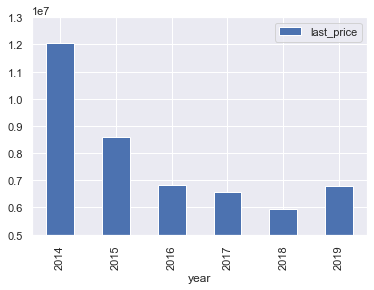

In [51]:
# от года
(realty
    .pivot_table(index='year', values='last_price')
    .plot(kind='bar', grid=True, ylim=(5000000, 13000000))
)
plt.show()

Видно резкий спад после 2014 года, продолжающийся до 2018. В 2019 ситуация изменилась, стоимость кваритр начала повышаться.


### Зависимость от цены за кв. метр

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


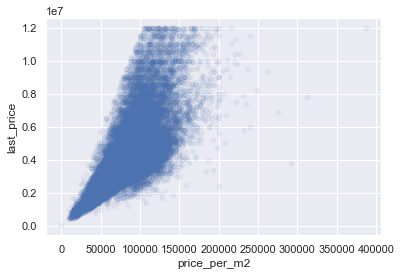

0.7380282666471605

In [52]:
(realty
    .query('total_area<=115 and last_price<=12000000 and rooms<=6 and cityCenters_nearest<=22000')
    .plot(x='price_per_m2', y='last_price', kind='scatter', alpha=0.07, grid=True)
)
plt.show()
realty['price_per_m2'].corr(realty['last_price'])

Есть чёткая завивсимость цены квартиры от цены квадратного метра. Чем она выше, тем дороже стоит квартира, коеф. корреляции это подтверждает

### Выделим топ 10 населённых пунктов по количеству объявлений

Составим сводные таблица, для дальнейшего их объединения в одну

In [53]:
realty_top10_counts = realty.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean'])
realty_top10_quad = realty.pivot_table(index='locality_name', values='price_per_m2', aggfunc='mean')

In [54]:
#Объединим таблицы
realty_top10 = realty_top10_counts.join(realty_top10_quad)

C:\ProgramData\Anaconda3\envs\practicum\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [55]:
#Переименуем столбцы
realty_top10.columns = ['count', 'mean', 'price_per_m2']

In [56]:
# выведим результат
realty_top10.round(decimals=1).sort_values(by='count', ascending=False).head(10)

,count,mean,price_per_m2
locality_name,,,
Санкт-Петербург,15650,8064452.2,114837.9
Мурино,586,3680840.8,86041.1
Кудрово,470,4354895.2,95260.8
поселок Шушары,439,4109808.7,78551.3
Всеволожск,398,3789067.8,68654.5
Пушкин,369,6469035.9,103125.8
Колпино,338,3964021.4,75424.6
поселок Парголово,327,4488074.8,90175.9
Гатчина,307,3488336.7,68746.1


Дороже всего квадратный метр жилья стоит в Санкт-Петербурге, что не удивительно. Дешевле приобретать жильё в Выборге, средняя стоимость кв.м. составляет 58141.9

### Какая область входит в центр

In [57]:
# составим новый фрейм с квартирами только из Петербурга
realty_spb = pd.DataFrame(realty.loc[realty['locality_name'] == "Санкт-Петербург"])
realty_spb.reset_index()
len(realty_spb)

15650

In [58]:
# создадим столбец с расстоянием до центра в км
realty_spb['cityCenters_nearest_km'] = (realty['cityCenters_nearest'] / 1000).astype('int').round(decimals=0)
realty_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_per_m2,week_day,month,year,cat_on_the_floors,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.5,0.2,120370.4,3,3,2019,другой,16
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.6,0.1,92785.7,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,89.8,9,False,False,False,29.8,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.6,0.2,408176.1,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.3,0.4,100000.0,1,6,2018,другой,8
7,5,7915000.0,71.6,2019-04-18,2,2.6,24,40.4,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.6,0.3,110544.7,3,4,2019,другой,11


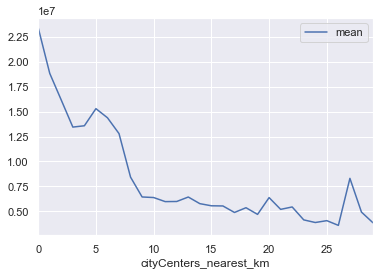

In [59]:
realty_spb.groupby('cityCenters_nearest_km')['last_price'].agg(['mean']).round(decimals=0).plot(grid=True)
plt.show()

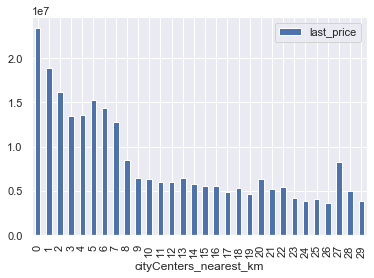

In [60]:
(realty_spb
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(kind='bar', grid=True)
)
plt.show()

Границей обозначу 5 км, далее цена идёт на спад - это значит что центральная зона заканчивается.


### Изучим сегмент квартир в центре и узнаем отличаются ли полученые данные от данных по всему городу

Центральная часть города имеет границу 5 км, в пределах этой  области  и будем проводить аанализ

In [61]:
# составим ещё один фрейм с квартирами только из центра Петербурга
realty_spb_center = pd.DataFrame(realty_spb.loc[realty_spb['cityCenters_nearest_km'] <= 5])
realty_spb_center.reset_index()
realty_spb_center['cityCenters_nearest_km'].value_counts()

4    903
5    768
3    524
2    307
1    240
0     86
Name: cityCenters_nearest_km, dtype: int64

### анализируем такие параметры как площадь, цена, число комнат, высота потолков

In [62]:
# площадь в центре
realty_spb_center['total_area'].describe()

count    2828.000000
mean       95.965700
std        60.748154
min        12.000000
25%        60.000000
50%        81.900000
75%       112.775000
max       631.200000
Name: total_area, dtype: float64

In [63]:
# площадь по всему городу
realty_spb['total_area'].describe()

count    15650.000000
mean        64.748888
std         40.426808
min         12.000000
25%         42.000000
50%         55.000000
75%         74.575000
max        900.000000
Name: total_area, dtype: float64

Площадь квартир в центре в среднем больше, чем по всему городу.

96 кв.м. в центре и 64 кв.м. по всему городу

In [64]:
# цена в центре
realty_spb_center['last_price'].describe().round(decimals=1)

count         2828.0
mean      15054583.4
std       25505634.6
min        1600000.0
25%        6900000.0
50%        9473000.0
75%       14508750.0
max      763000000.0
Name: last_price, dtype: float64

In [65]:
# цена по всему городу
realty_spb['last_price'].describe().round(decimals=1)

count        15650.0
mean       8064452.2
std       13036561.2
min          12190.0
25%        4200000.0
50%        5500000.0
75%        8150000.0
max      763000000.0
Name: last_price, dtype: float64

Средняя стоимость квартиры в центре Петербурга существенно выше чем по всему городу. Но это не удивительно, во первых это центр, в центре любого города стоимость жилья выше, чем по районам, а во вторых как показывает исследование средняя площадь квартир так же больше.

In [66]:
# число комнат в центре
realty_spb_center['rooms'].describe().round(decimals=0)

count    2828.0
mean        3.0
std         2.0
min         0.0
25%         2.0
50%         3.0
75%         4.0
max        19.0
Name: rooms, dtype: float64

In [67]:
# число комнат по всему городу
realty_spb['rooms'].describe().round(decimals=0)

count    15650.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

Количество комнат так же подтверждают теорию о том, чтот в центре средняя площадь квартир выше.

In [68]:
# высота потолков в центре
realty_spb_center['rooms'].describe().round(decimals=1)

count    2828.0
mean        2.9
std         1.5
min         0.0
25%         2.0
50%         3.0
75%         4.0
max        19.0
Name: rooms, dtype: float64

In [69]:
# высота потолков по всему городу
realty_spb['rooms'].describe().round(decimals=1)

count    15650.0
mean         2.2
std          1.1
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

Ну и потолки в квартиирах немного выше

### Какие факторы влияют на стоимость квартиры

Ранее я проводил такое исследование для кваритр по всему Санкт-Петербургу, сделаю тоже самое, но добавлю кретерий, чтобы провести исследование только по центру города

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


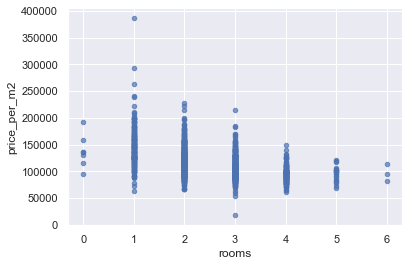

0.05621749345293527

In [70]:
# зависимость от числа комнат
(realty_spb_center
    .query('total_area<=115 and last_price<=12000000 and rooms<=6 and cityCenters_nearest<=5000')
    .plot(x='rooms', y='price_per_m2', kind='scatter', alpha=0.7, grid=True)
)
plt.show()
realty['rooms'].corr(realty['price_per_m2'])

Коэффициент кореляции очень маленький, это доказывает, что количество комнат не влияет на цену квадратного метра. Предполагаю, что основная зависимость зависит от расположения квартииры, ведь планировка свободная, могу сделать и перепланировку квартиры

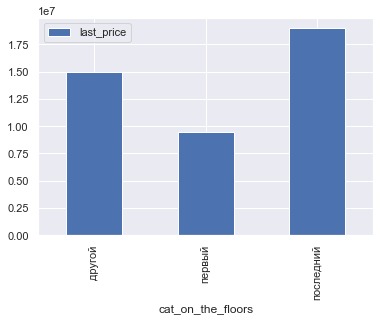

In [71]:
# зависимость от этажа
realty_spb_center.pivot_table(index='cat_on_the_floors', values='last_price').plot(kind='bar', grid=True)
plt.show()

Ситуация с этажами такая же как и по всему городу, первый этаж дешевле остальных, на последнем этаже самые дорогие квартиры.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


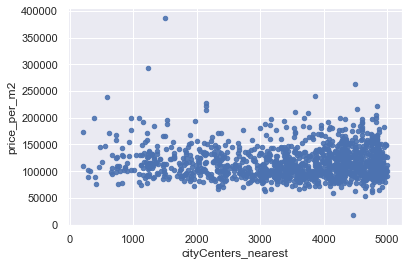

-0.2526861960467875

In [72]:
# зависимость от удалённости от центра
(realty_spb_center
    .query('total_area<=115 and last_price<=12000000 and rooms<=6 and cityCenters_nearest<=5000')
    .plot(x='cityCenters_nearest', y='price_per_m2', kind='scatter', grid=True, alpha=0.9)
)
plt.show()
realty['cityCenters_nearest'].corr(realty['price_per_m2'])

В пределах центра Петербурга цены на кв. метр примерно одинаковые, но больше предложений ближе к окраине. 

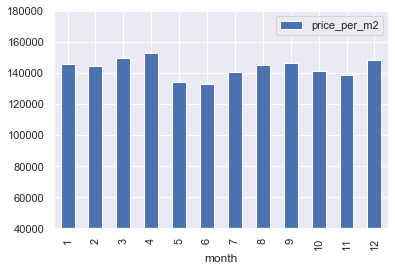

-0.0019812122486954293

In [73]:
# от месяца
(realty_spb_center
    .pivot_table(index='month', values='price_per_m2')
    .plot(kind='bar', grid=True, ylim=(40000, 180000) )
)
plt.show()
realty['month'].corr(realty['price_per_m2'])

Ближе к лету есть просадка, но в августе график выравнивается, так же небольшая просадкаа имееется зимой, но в декабре так же, как и летом стоимость увеличивается. Какой-то завивсимости проследить не могу, довверюсь фактам.

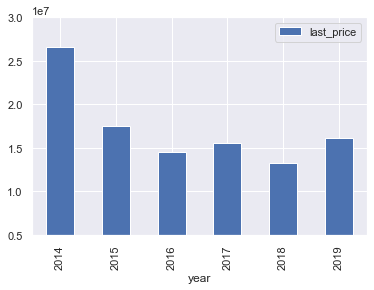

0.00838938502283282

In [74]:
# от года
(realty_spb_center
    .pivot_table(index='year', values='last_price')
    .plot(kind='bar', grid=True, ylim=(5000000, 30000000))
)
plt.show()
realty['year'].corr(realty['price_per_m2'])

Зависимость от года такая же как и по всему городу, после 2014 резкий спад. 

## Общий вывод

В ходе исследования обнаружил следующее: 


- рынок недвижимости в Петербурге гораздо больше, чем в  остальных населённых пунктах
- предложения разнообразные, но как показало исследование, есть определённые закономерности. Например в центре Петербурга потолки выше и площадь квартир больше, но в связи с этим и цена выше.
- в остальном городе ситуация немного другая, квартиры немного меньше, потолки ниже, но в свою очередь и стоимость ниже.

Факторы влияющие на стоимость:

- основным фактором могу выделить расположение относительно центра
- второй немаловажный фактор - площадь квартиры и следовательно количество комнат
- этаж так же играет роль, как показало исследование квартииры на последнем этаже дороже, что в принципе ожидаемо (нет соседей сверху, чище воздух, меньше шума)




